# Disability Complaints Against the largest US Airline Carriers

This notebook contains exploratory code for the data analysis of disability-complaint related data from 2019-2023 for the top U.S Carriers by market share. There are 11 such carriers.

In [1]:
import pandas as pd

# Show a large number of rows and columns when displaying dfs
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
from IPython.display import display, HTML

## Loading Data

In [2]:
# Load the summaries of all complaints
summary = pd.read_csv("data/summary.csv")

# Total complaints split up by airlines
total_complaints = pd.read_csv("data/largest_us_carriers.csv")

# Complaints by category and airline
complaint_categories = pd.read_csv("data/per_airline.csv")

#### A little clean up of wrongly encoded data types

In [3]:
summary.head()

,year,largest_share_complaints,total_disability_complaints,pct_responsible,num_enplaned_passengers,departed_flights
0,2023,"40,795","41,620",98.02,729488000,5843000
1,2022,"35,608","36,434",97.73,765245000,6117000
2,2021,"31,499","32,047",98.29,488832000,4445000
3,2020,"12,957","13,450",96.33,321780000,3708000
4,2019,33810,35510,95.21,689017000,5769000


In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         5 non-null      int64  
 1   largest_share_complaints     5 non-null      object 
 2   total_disability_complaints  5 non-null      object 
 3   pct_responsible              5 non-null      float64
 4   num_enplaned_passengers      5 non-null      int64  
 5   departed_flights             5 non-null      int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 372.0+ bytes


In [5]:
summary["largest_share_complaints"] = summary["largest_share_complaints"].str.replace(",","").astype(int)
summary["total_disability_complaints"] = summary["total_disability_complaints"].str.replace(",","").astype(int)

In [6]:
total_complaints.head()

,Year,Carrier,Complaints,Enplaned Passengers,Departures
0,2023,American,9717,130838000.0,933000
1,2023,Delta,8813,135813000.0,970000
2,2023,United,7022,102463000.0,722000
3,2023,Southwest,7091,164917000.0,1400000
4,2023,Alaska Airlines,1042,32817000.0,250000


In [7]:
total_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 55 non-null     int64  
 1   Carrier              55 non-null     object 
 2   Complaints           55 non-null     int64  
 3   Enplaned Passengers  55 non-null     float64
 4   Departures           55 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ KB


In [8]:
complaint_categories.head()

,year,carrier,type_of_complaint,count
0,2023.0,American,Refusal To Board Passenger,35
1,2023.0,American,Refusal to Board w/o Attendant,6
2,2023.0,American,Security Issues Regarding Disability,4
3,2023.0,American,Aircraft Not Accessible,11
4,2023.0,American,Airport Not Accessible,4


In [9]:
complaint_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               715 non-null    float64
 1   carrier            715 non-null    object 
 2   type_of_complaint  715 non-null    object 
 3   count              715 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [10]:
complaint_categories["count"] = complaint_categories["count"].fillna(0).astype(int)
complaint_categories["type_of_complaint"] = complaint_categories["type_of_complaint"].str.strip()

In [11]:
%reload_ext rpy2.ipython
%reload_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

In [12]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


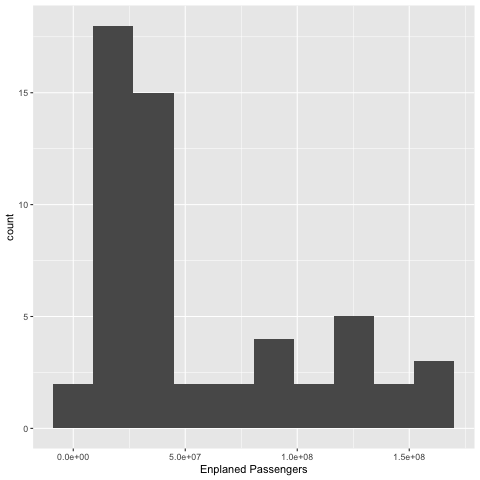

In [13]:
%%R -i total_complaints

ggplot(total_complaints) +
    aes(x = `Enplaned Passengers`) +
    geom_histogram(bins = 10)


In [14]:
# convert the passenger number to a better scale - millions
summary["num_enplaned_passengers_million"] = summary["num_enplaned_passengers"] / 1000000
total_complaints["enplaned_passengers_per_million"] = total_complaints["Enplaned Passengers"] / 1000000

In [15]:
# convert departures to a thousand

summary["departures_per_million"] = summary["departed_flights"] / 1000
total_complaints["departures_per_million"] = total_complaints["Departures"] / 1000

In [16]:
total_complaints.head()

,Year,Carrier,Complaints,Enplaned Passengers,Departures,enplaned_passengers_per_million,departures_per_million
0,2023,American,9717,130838000.0,933000,130.838,933.0
1,2023,Delta,8813,135813000.0,970000,135.813,970.0
2,2023,United,7022,102463000.0,722000,102.463,722.0
3,2023,Southwest,7091,164917000.0,1400000,164.917,1400.0
4,2023,Alaska Airlines,1042,32817000.0,250000,32.817,250.0


## Visuals

In [17]:
# approv 819 million domestic passengers in 2023

In [18]:
# First graph - rate of disability complaints per million passengers and then per 1000 departures

total_complaints["complaint_rate_passengers"] = total_complaints["Complaints"] / total_complaints["enplaned_passengers_per_million"]
total_complaints.head()

,Year,Carrier,Complaints,Enplaned Passengers,Departures,enplaned_passengers_per_million,departures_per_million,complaint_rate_passengers
0,2023,American,9717,130838000.0,933000,130.838,933.0,74.267415
1,2023,Delta,8813,135813000.0,970000,135.813,970.0,64.890695
2,2023,United,7022,102463000.0,722000,102.463,722.0,68.532055
3,2023,Southwest,7091,164917000.0,1400000,164.917,1400.0,42.997387
4,2023,Alaska Airlines,1042,32817000.0,250000,32.817,250.0,31.751836


In [25]:
total_complaints[total_complaints["Year"] == 2023]

,Year,Carrier,Complaints,Enplaned Passengers,Departures,enplaned_passengers_per_million,departures_per_million,complaint_rate_passengers
0,2023,American,9717,130838000.0,933000,130.838,933.0,74.267415
1,2023,Delta,8813,135813000.0,970000,135.813,970.0,64.890695
2,2023,United,7022,102463000.0,722000,102.463,722.0,68.532055
3,2023,Southwest,7091,164917000.0,1400000,164.917,1400.0,42.997387
4,2023,Alaska Airlines,1042,32817000.0,250000,32.817,250.0,31.751836
5,2023,JetBlue,2128,32474000.0,273000,32.474,273.0,65.529347
6,2023,Spirit,3427,38556000.0,258000,38.556,258.0,88.883702
7,2023,Frontier,859,27613000.0,171000,27.613,171.0,31.108536
8,2023,SkyWest,37,36619000.0,671000,36.619,671.0,1.010404
9,2023,Hawaiian,181,10055000.0,80000,10.055,80.0,18.000995


In [29]:
3427/258

13.282945736434108

In [19]:
total_complaints.to_clipboard()

### Step chart of changing airline complaint rates

In [20]:
# to get the rates over the years of all the airlines

total_complaints.pivot_table(index = "Year",
                            columns = "Carrier",
                            values = "complaint_rate_passengers").to_clipboard()

In [21]:
# calculating complaint rate over the years
summary["complaint_rate_passenger"] = summary["largest_share_complaints"] / summary["num_enplaned_passengers_million"]

In [22]:
summary

,year,largest_share_complaints,total_disability_complaints,pct_responsible,num_enplaned_passengers,departed_flights,num_enplaned_passengers_million,departures_per_million,complaint_rate_passenger
0,2023,40795,41620,98.02,729488000,5843000,729.488,5843.0,55.922784
1,2022,35608,36434,97.73,765245000,6117000,765.245,6117.0,46.531503
2,2021,31499,32047,98.29,488832000,4445000,488.832,4445.0,64.437271
3,2020,12957,13450,96.33,321780000,3708000,321.780,3708.0,40.266642
4,2019,33810,35510,95.21,689017000,5769000,689.017,5769.0,49.069907


In [35]:
filtered_categories = complaint_categories[complaint_categories["type_of_complaint"] != "Other"]

In [36]:
filtered_categories.to_clipboard()

In [32]:
complaint_categories[(complaint_categories["year"] == 2023) & (complaint_categories["carrier"] == "Spirit")] 

,year,carrier,type_of_complaint,count
78,2023.0,Spirit,Refusal To Board Passenger,58
79,2023.0,Spirit,Refusal to Board w/o Attendant,0
80,2023.0,Spirit,Security Issues Regarding Disability,0
81,2023.0,Spirit,Aircraft Not Accessible,7
82,2023.0,Spirit,Airport Not Accessible,2
83,2023.0,Spirit,Advance Notice Dispute,51
84,2023.0,Spirit,Seating Accommodation,359
85,2023.0,Spirit,Failure to Provide Assistance,1403
86,2023.0,Spirit,Damage to Assistive Device,180
87,2023.0,Spirit,Storage and Delay of Assistive Device,310


In [33]:
1403/3472

0.4040898617511521

In [34]:
7.3+7+7.19+5.19+6.3+5.14+5.98+5.95+5.53+6.13+5.54+4.67

71.92000000000002